In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%load_ext rpy2.ipython

1. Why would you not use a normal distribution to represent the model which generated the data?
- data are discrete
- because the disease is a binary outcome


2. Why would you not use a Poisson distribution?
- We git fixed sample size, poisson get from 0 to infinity
- Note sure. Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time is these events occur with a known constant  mean rate and independently of the time since last event.
- In our case, the disease likely happen at different rate between samples and if it is infectious disease, it is likely that geographical distance will affect the speed of disease prevalance.


3. Why might a binomial distribution be an appropriate probability distribution?
- representing a sum of binary outcome → to do with our data
- we assume that $\theta$ is fixed, samples are conditionally independent. Intrinsically samples are independent → to do with the binomial

4. Plot the binomial distribution with N=10 and show how it varies across θ=(0.1,0.5,0.9)

In [61]:
%%R
library(tidyverse)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



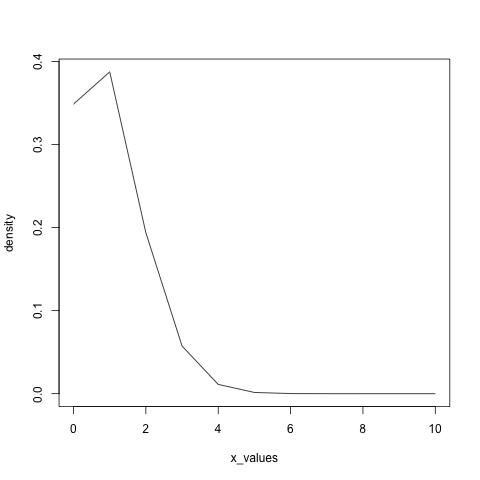

In [18]:
%%R
N <- 10
theta <- 0.1 # this is to be changed
x_values <- seq(0, N, 1)
density <- dbinom(x_values, N, theta) # element-wise function application
plot(x_values, density, type = 'l')


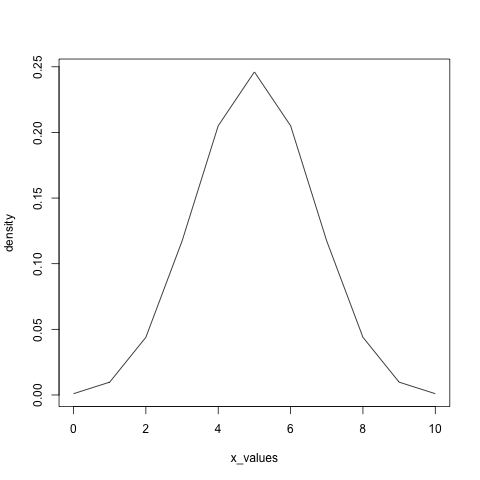

In [19]:
%%R
N <- 10
theta <- 0.5 # this is to be changed
x_values <- seq(0, N, 1)
density <- dbinom(x_values, N, theta)
plot(x_values, density, type = 'l')


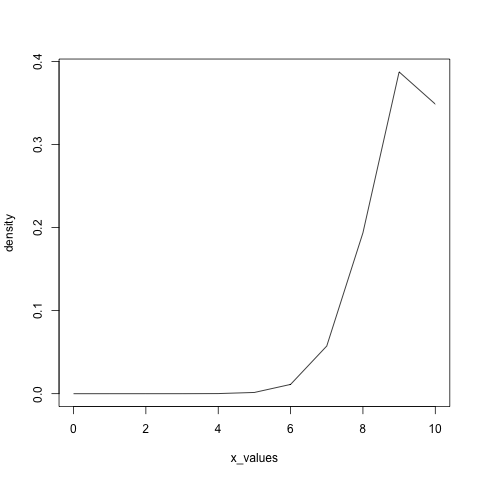

In [20]:
%%R
N <- 10
theta <- 0.9 # this is to be changed
x_values <- seq(0, N, 1)
density <- dbinom(x_values, N, theta)
plot(x_values, density, type = 'l')


5. plot likelihood function. Say we know that X = 4

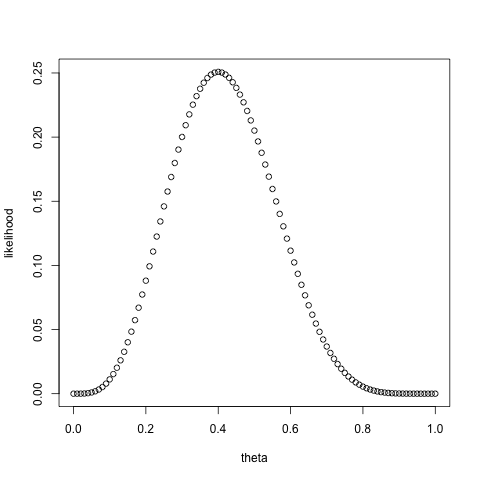

In [21]:
%%R
# plot likelihood function # Say we know that X = 4
x <- 4
theta <- seq(0, 1, 0.01)
likelihood <- dbinom(x, 10, theta)
plot(theta, likelihood) #, type = 'l'

6. What’s the maximum likelihood estimate of θ?

The maximum likelihood is 0.4 and this means if that is the case, the probability of getting 4 diseased cases out of 10 samples in the real world is the greatest.

## Bayesian Estimation
7. Assume that based on a previous meta-analysis, we have a prior θ∼beta(1,4) Plot the numerator of Bayes’ rule: p(θ)×p(X|θ).

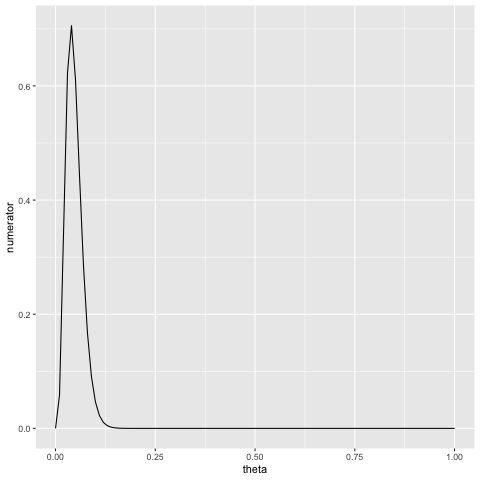

In [65]:
%%R
likelihood <- function(theta) dbinom(X, N, theta)
prior <- function(theta) dbeta(theta, 1, 4)
numerator <- function(theta) likelihood(theta) * prior(theta)
numerator_values <- map_dbl(theta, ~numerator(.))
tibble(theta=theta, numerator=numerator_values) %>%
  ggplot(aes(x=theta, y=numerator)) +
  geom_line()

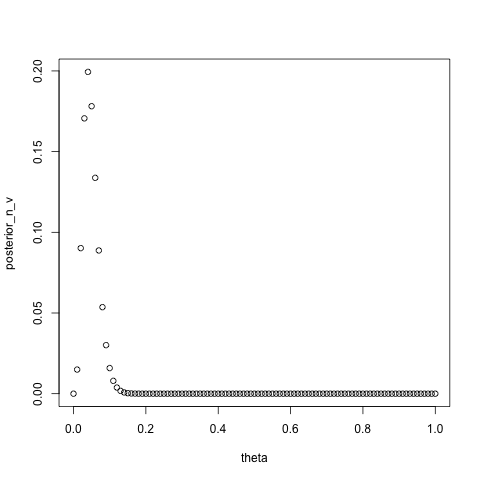

In [68]:
%%R

prior <- function(theta, a, b){dbeta(theta, a, b)}
likelihood <- function(theta, X, N){ dbinom(X, N, theta) }
posterior_u <- function(theta, X, N, a, b){ likelihood(theta, X, N)*prior(theta, a, b) }

theta <- seq(0, 1, 0.01)
X <- 4
N <- 100
a <- 1
b <- 1

posterior_n_v <- vector(length = length(theta))
for (i in seq_along(theta))
    posterior_n_v[i] <- posterior_u(theta[i], X, N, a, b)

plot(theta, posterior_n_v)

8. Determine the denominator of Bayes’ rule using numerical integration:

In [78]:
%%R
posterior_u_s <- function(theta) {
    posterior_u(theta, X, N, a, b)
}
denom <- integrate(posterior_u_s, 0, 1)$value # the 0 and 1 are the lower and upper bounds of all possible theta values 

9. Hence make a function that yields the posterior density.

In [79]:
%%R
posterior_d <- function(theta, X,  N, a, b){
    posterior_u(theta, X, N, a, b)/denom
}
posterior_d(theta, X, N, 1, 1)

  [1]  0.000000e+00  1.509113e+00  9.111007e+00  1.723117e+01  2.013824e+01
  [6]  1.799241e+01  1.350897e+01  8.963928e+00  5.416697e+00  3.038693e+00
 [11]  1.603334e+00  8.030721e-01  3.844188e-01  1.767522e-01  7.836220e-02
 [16]  3.359890e-02  1.396479e-02  5.636840e-03  2.212906e-03  8.459006e-04
 [21]  3.151388e-04  1.145041e-04  4.059904e-05  1.405284e-05  4.749993e-06
 [26]  1.568139e-06  5.056868e-07  1.592916e-07  4.901115e-08  1.472776e-08
 [31]  4.321555e-09  1.237949e-09  3.460977e-10  9.440173e-11  2.511173e-11
 [36]  6.511747e-12  1.645245e-12  4.048021e-13  9.693480e-14  2.257697e-14
 [41]  5.110968e-15  1.123755e-15  2.397881e-16  4.961387e-17  9.944992e-18
 [46]  1.929352e-18  3.618890e-19  6.555685e-20  1.145590e-20  1.928699e-21
 [51]  3.124234e-22  4.862365e-23  7.259644e-24  1.038104e-24  1.419286e-25
 [56]  1.851805e-26  2.301188e-27  2.717780e-28  3.043596e-29  3.224047e-30
 [61]  3.221865e-31  3.028759e-32  2.670147e-33  2.200244e-34  1.688508e-35
 [66]  1.202

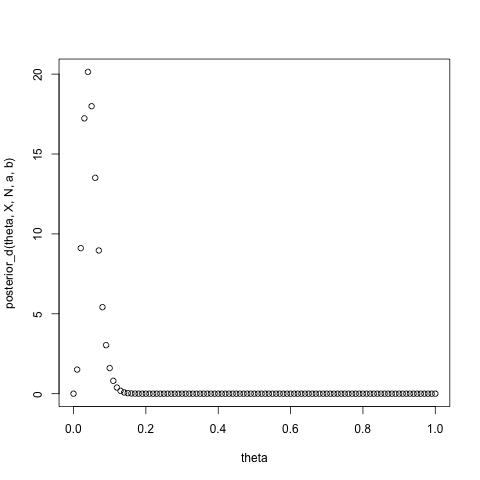

In [82]:
%%R
# plot the probability density
plot(theta, posterior_d(theta, X, N, a, b))

It is called **density** because of continuous, if the parameter $\theta$ is discrete we call it **mass**. Essentially density means the proportion of the possible posterior value over all possible posterior values. 

10. An alternative way to obtain the posterior distribution is to use conjugate prior rules. i.e. that if θ∼beta(a,b) and X|θ∼(N,θ), then θ|X∼beta(a+X,b+N−X). Use this relationship to investigate how the posterior changes holding b=4 and change from a=1 to a=8.

[1] 0.4376587


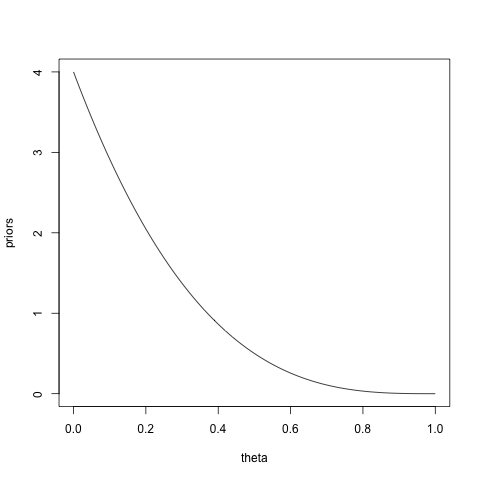

In [28]:
%%R
a <-1
b <-4
theta <- seq(0, 1, 0.01)
priors <- dbeta(theta, a, b)
plot(theta, priors, type = 'l')

In [27]:
%%R
#mean of beta distribution
a/(a+b)


[1] 0.2


In [ ]:
%%R
qbeta(0.1, a, b)
qbeta(0.9, a, b)

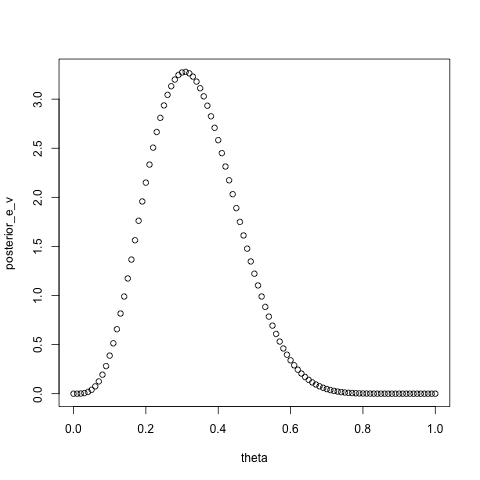

In [36]:
%%R
X <- 4
N <- 10
a <- 1
b <- 4
posterior_e <- function(theta, X, N, a, b){ dbeta(theta, X+a, N-X+b)}# exact
posterior_e_v <- posterior_e(theta, X, N, a, b)
plot(theta, posterior_e_v)

11. Calculate the posterior 10%-90% quantiles assuming a=1

In [37]:
%%R
# calculate the quantiles
a <- 1
print(qbeta(0.1, X+a, N-X+b)) # lower quantile of beta distribution
print(qbeta(0.9, X+a, N-X+b)) # upper quantile of beta distribution
print(qbeta(0.5, X+a, N-X+b)) # mean of beta distribution


[1] 0.1851342
[1] 0.4919652
[1] 0.3257512


Note that the mean is slightly smaller(0.325) that the maximum likelihood(which is 0.4). This is because our prior bias towards 0 and therefore forces the estimate to get smaller.

12. Forecast what data will be obtained in a second experiment, where N=100
 assuming a=1. You can do this by sampling by iterating the following steps:

- θi∼p(θ|X), i.e. draw from the posterior distribution.
- Xi∼p(X|θi), i.e. draw from the sampling distribution.

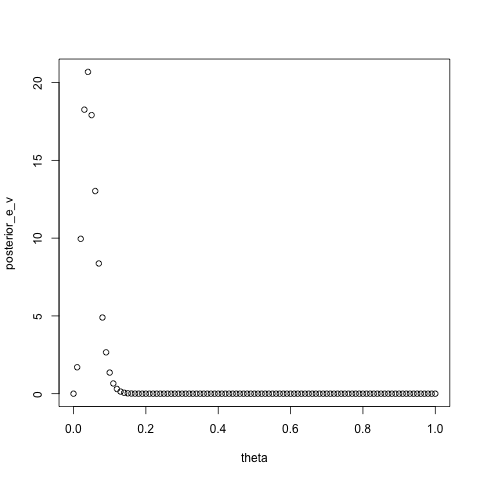

In [38]:
%%R
X <- 4
N <- 100
a <- 1
b <- 4
posterior_e <- function(theta, X, N, a, b){ dbeta(theta, X+a, N-X+b)}# exact
posterior_e_v <- posterior_e(theta, X, N, a, b)
plot(theta, posterior_e_v)

In [51]:
%%R
qbeta(0.1, X+a, N-X+b)
qbeta(0.9, X+a, N-X+b)
qbeta(0.5, X+a, N-X+b) # note that in beta distribution this can also be calculated as a/(a+b)


[1] 0.06581756


12.1 The distribution of p(X) obtained via this process is known as the posterior predictive distribution. In your case, use 10,000 draws from this distribution then plot a histogram of the resultant draws.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


In addition: Warning message:
`qplot()` was deprecated in ggplot2 3.4.0.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


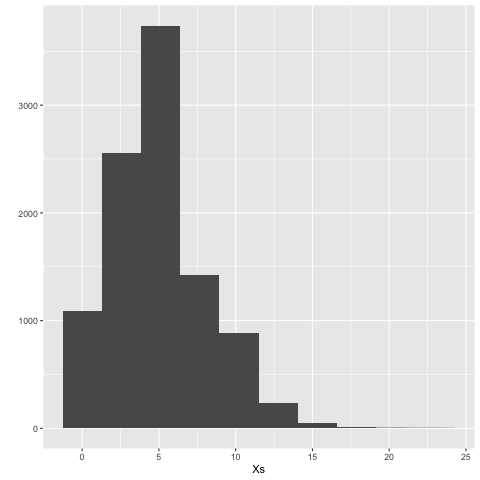

In [83]:
%%R
n_draws <- 10000
Xs <- vector(length = n_draws)
for(i in 1:n_draws) {
  theta_i <- rbeta(1, a + X, b + N - X)
  Xs[i] <- rbinom(1, 100, theta_i)
}
qplot(Xs) +
  geom_histogram(bins=10)

## MCMC Problem Sheet

number of ticks =  100

1. In a single sample you ﬁnd that there are 6 ticks that test positive
for Borrelia. Assuming a Beta(1,1) prior analytically calculate the posterior distribution. (Hint: by analytically here I mean look up the result on Google/in the lecture notes.) Graph this distribution.

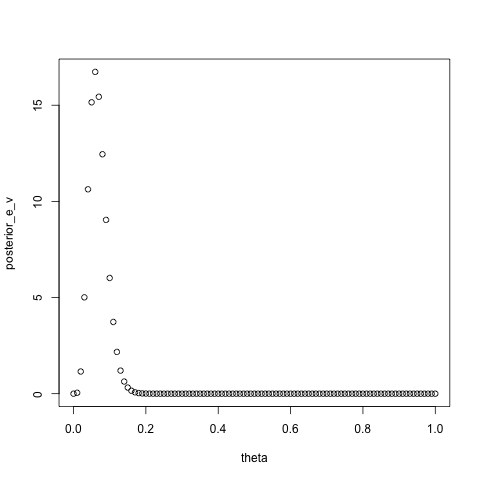

In [45]:
%%R
N <- 100
X <- 6
a <- 1
b <- 1
theta <- seq(0, 1, 0.01)
posterior_e <- function(theta, X, N, a, b){ dbeta(theta, X+a, N-X+b)}# exact
posterior_e_v <- posterior_e(theta, X, N, a, b)
plot(theta, posterior_e_v)


Problem 1.2 Generate 100 independent samples from this distribution using
your software’s inbuilt (pseudo-)random number generator. Graph this distribution. How does it compare to the pdf of the exact posterior? (Hint: in R the command is “rbeta”; in Matlab it is “betarnd“; in Mathematica it is “Random-Variate[BetaDistribution...]”; in Python it is “numpy.random.beta”.)

In [55]:
%%R 
install.packages('ggplot2')
library(ggplot2)


The downloaded binary packages are in
	/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T//RtmpjpgRT6/downloaded_packages


also installing the dependency ‘scales’

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/scales_1.3.0.tgz'
Content type 'application/x-gzip' length 708175 bytes (691 KB)
downloaded 691 KB

trying URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/ggplot2_3.5.1.tgz'
Content type 'application/x-gzip' length 4966855 bytes (4.7 MB)
downloaded 4.7 MB

Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org


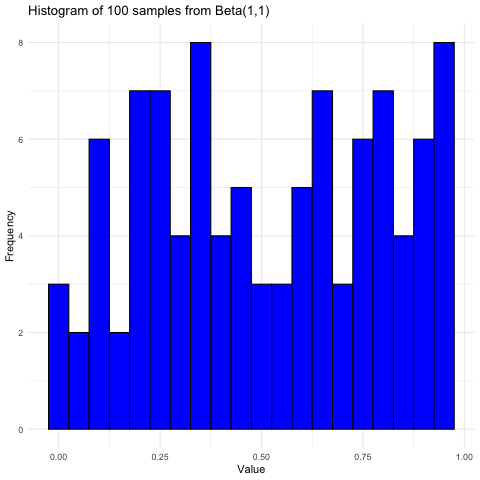

In [57]:
%%R
N_draw <- 100
a <- 1
b <- 1
# sequence <- seq(0, 1, 0.01)
samples <- rbeta(N_draw, a, b, ncp = 0)

df <- data.frame(samples)

# Plot the histogram of the samples
ggplot(df, aes(x=samples)) +
  geom_histogram(binwidth=0.05, fill='blue', color='black') +
  theme_minimal() +
  labs(title="Histogram of 100 samples from Beta(1,1)",
       x="Value",
       y="Frequency")

Problem 1.3 Evaluate the eﬀect of increasing the sample size for your inde-
pendent sampler on the estimate of the mean of the distribution

In [59]:
%%R
N <- 1000
X <- 6
a <- 1
b <- 1
theta <- seq(0, 1, 0.01)
posterior_e <- function(theta, X, N, a, b){ dbeta(theta, X+a, N-X+b)}# exact
posterior_e_v <- posterior_e(theta, X, N, a, b)
# plot(theta, posterior_e_v)


qbeta(0.5, X+a, N-X+b)

[1] 0.006660746


Problem 1.4 Estimate the variance of the posterior using independent sam-
pling for a sample size of 100. How does your sample estimate compare with
the exact solution?